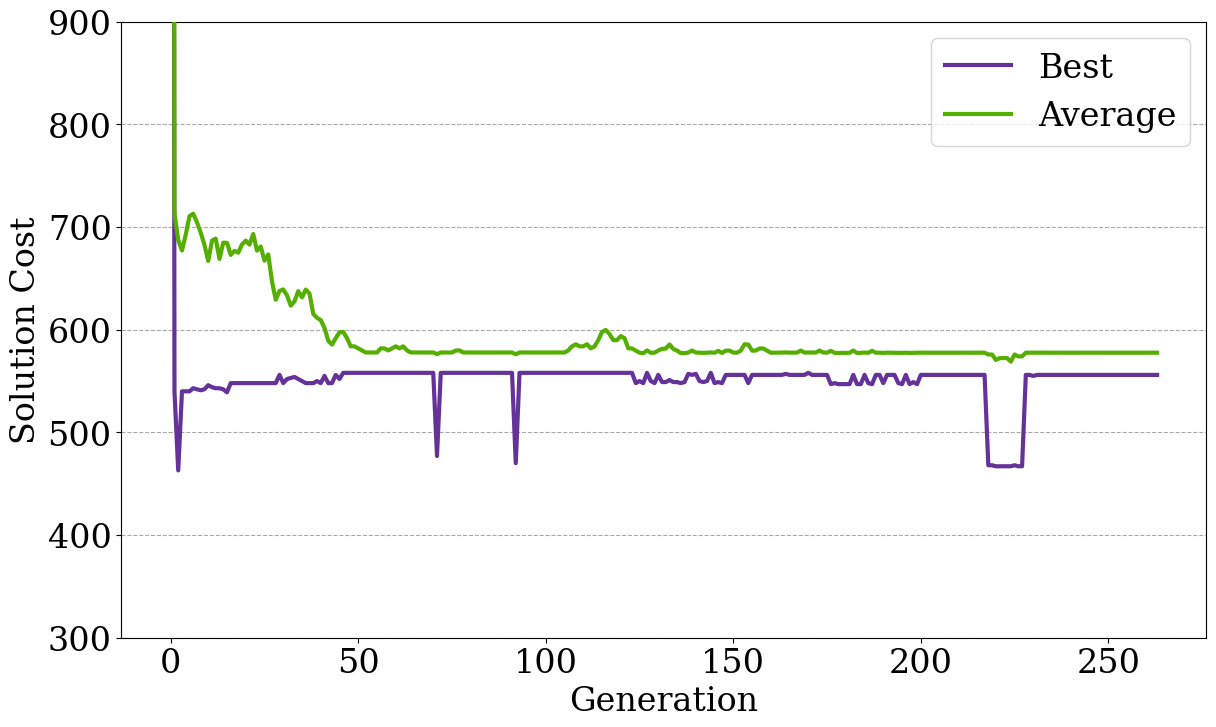

In [84]:
import numpy as np
from matplotlib import rcParams
import matplotlib.pyplot as plt
import pandas as pd
import os

rcParams['font.family'] = 'serif'
rcParams['font.size'] = 24

prefix = "basic"
it = 0

pathCWD = os.getcwd() + "/output/"
pathFile = pathCWD + "GA_log_1s_64g_80d.dat"
dataPkt = pd.read_csv(pathFile, sep=",")
pdLog = pd.DataFrame(dataPkt)

fig, ax1 = plt.subplots(figsize=(14, 8))

color1 = '#643299'
color2 = '#054AE3'
color3 = '#C84929'
color4 = '#DFAD23'
color5 = '#55AF01'
alpha = 0.6

ax1.plot(pdLog['gen'], pdLog['bestCost'], color1, linewidth=3, label='Best', zorder=6)
ax1.plot(pdLog['gen'], pdLog['avgCost'], color=color5, linewidth=3, label='Average', zorder=6)

ax1.set_xlabel("Generation")
ax1.set_ylabel("Solution Cost")
ax1.set_ylim(300, 900)
ax1.tick_params(axis='y', which='major')
ax1.grid(True, 'major', 'y', linestyle='--', color='darkgrey', zorder=0)

bars, labels = ax1.get_legend_handles_labels()
ax1.legend(bars, labels, loc='best')
# fig.suptitle('Solving Time by Number of Virtual Positions')
plt.show()
# plt.savefig('fig/fig..pdf', format='pdf', bbox_inches = 'tight', pad_inches = 0)

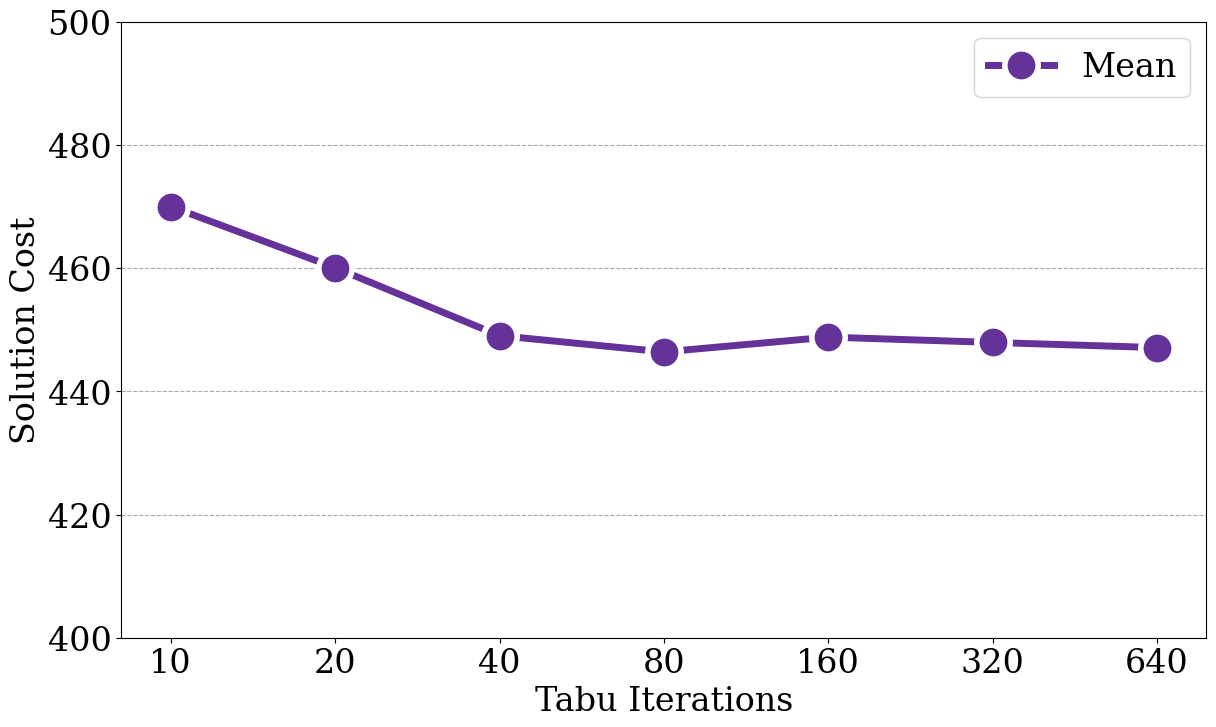

In [83]:
import numpy as np
from matplotlib import rcParams
import matplotlib.pyplot as plt
import pandas as pd
import os

rcParams['font.family'] = 'serif'
rcParams['font.size'] = 24

prefix = "basic"
it = 0

pathCWD = os.getcwd() + "/output/"
pathFile = pathCWD + "GA_solutions.dat"
dataPkt = pd.read_csv(pathFile, sep=",")
pdLog = pd.DataFrame(dataPkt)

fig, ax1 = plt.subplots(figsize=(14, 8))

color1 = '#643299'
color2 = '#054AE3'
color3 = '#C84929'
color4 = '#DFAD23'
color5 = '#55AF01'
alpha = 0.6

pdMean = pdLog.groupby(['TabuIterations']).mean()

x = range(len(pdMean['objective']))
xTick = ['10', '20', '40', '80', '160', '320', '640']
ax1.plot(x, pdMean['objective'], color1, label='Mean', zorder=6, marker="o", markersize=24, mew=4, mec='white', linewidth=5)
# ax1.plot(pdLog['gen'], pdLog['avgCost'], color=color2, linewidth=3, label='Average', zorder=6)

ax1.set_xlabel("Tabu Iterations")
ax1.set_ylabel("Solution Cost")
ax1.set_xticks(x, xTick)
ax1.set_ylim(400, 500)
ax1.tick_params(axis='y', which='major')
ax1.grid(True, 'major', 'y', linestyle='--', color='darkgrey', zorder=0)

bars, labels = ax1.get_legend_handles_labels()
ax1.legend(bars, labels, loc='best')
# fig.suptitle('Solving Time by Number of Virtual Positions')
plt.show()
# plt.savefig('fig/fig..pdf', format='pdf', bbox_inches = 'tight', pad_inches = 0)

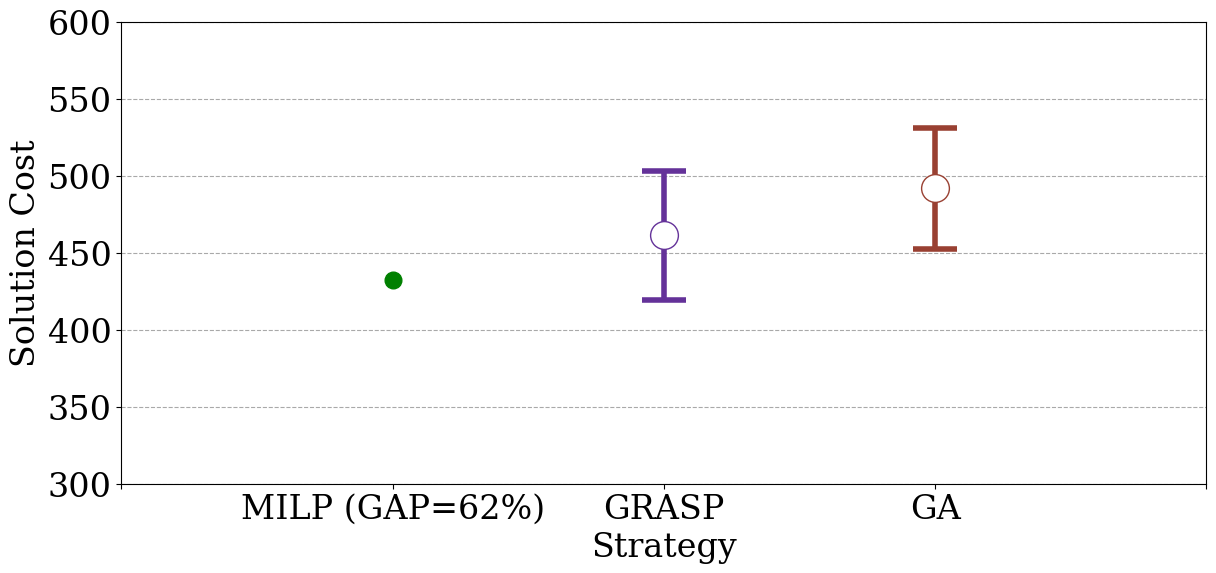

In [94]:
import numpy as np
from matplotlib import rcParams
import matplotlib.pyplot as plt
import pandas as pd
import os

rcParams['font.family'] = 'serif'
rcParams['font.size'] = 24

means_ga = []
error_ga = []
means_grasp = []
error_grasp = []
indexes = []

pathCWD = os.getcwd() + "/output/"

pathFile = pathCWD + "MILP_perf_solutions.csv"
dataPkt = pd.read_csv(pathFile, sep=",")
dfBest = pd.DataFrame(dataPkt)
dfBest = dfBest.loc[dfBest['numDevices'] == 80]

costs_ga = []
costs_grasp = []

# ---- Random Diversification ----
pathFile = pathCWD + "GA_perf_solutions.csv"
dataPkt = pd.read_csv(pathFile, sep=",")
dfLog = pd.DataFrame(dataPkt)
costs_ga.append(dfLog.loc[dfLog['numDevices'] == 80]['objective'].array)

# ---- Random Diversification ----
pathFile = pathCWD + "GRASP_perf_solutions.csv"
dataPkt = pd.read_csv(pathFile, sep=",")
dfLog = pd.DataFrame(dataPkt)
costs_grasp.append(dfLog.loc[dfLog['numDevices'] == 80]['objective'].array)

means_ga.append(np.mean(costs_ga))
error_ga.append(np.std(costs_ga)/np.sqrt(len(costs_ga)))

means_grasp.append(np.mean(costs_grasp))
error_grasp.append(np.std(costs_grasp)/np.sqrt(len(costs_grasp)))


fig, ax1 = plt.subplots(figsize=(14, 6))

color1 = '#643299'
color2 = '#994032'
color3 = '#993280'
color4 = '#993242'
color5 = '#853299'
alpha = 0.6

ax1.plot(1, dfBest['objective'], linestyle="", color="green", marker="o", markersize=12, label='Best GAP(66%)', zorder=4)

ax1.errorbar(2, means_grasp, error_grasp, color=color1, mfc='white', marker='o', markersize=20, linestyle='', label='GRASP', capsize=16, capthick=4, lw=4, zorder=4)

ax1.errorbar(3, means_ga, error_ga, color=color2, mfc='white', marker='o', markersize=20, linestyle='', label='GA', capsize=16, lw=4, capthick=4, zorder=4)


ax1.set_xticks([0,1,2,3,4], ["", "MILP (GAP=62%)", "GRASP", "GA", ""])
ax1.set_xlabel("Strategy")
ax1.set_ylabel("Solution Cost")
ax1.tick_params(axis='y', which='major')
ax1.set_ylim(300, 600)
ax1.grid(True, 'major', 'y', linestyle='--', color='darkgrey', zorder=0)

bars, labels = ax1.get_legend_handles_labels()
# plt.legend(loc='best', ncol=4)
# fig.suptitle('Solving Time by Number of Virtual Positions')
# plt.show()
# plt.savefig('fig/fig..pdf', format='pdf', bbox_inches = 'tight', pad_inches = 0)

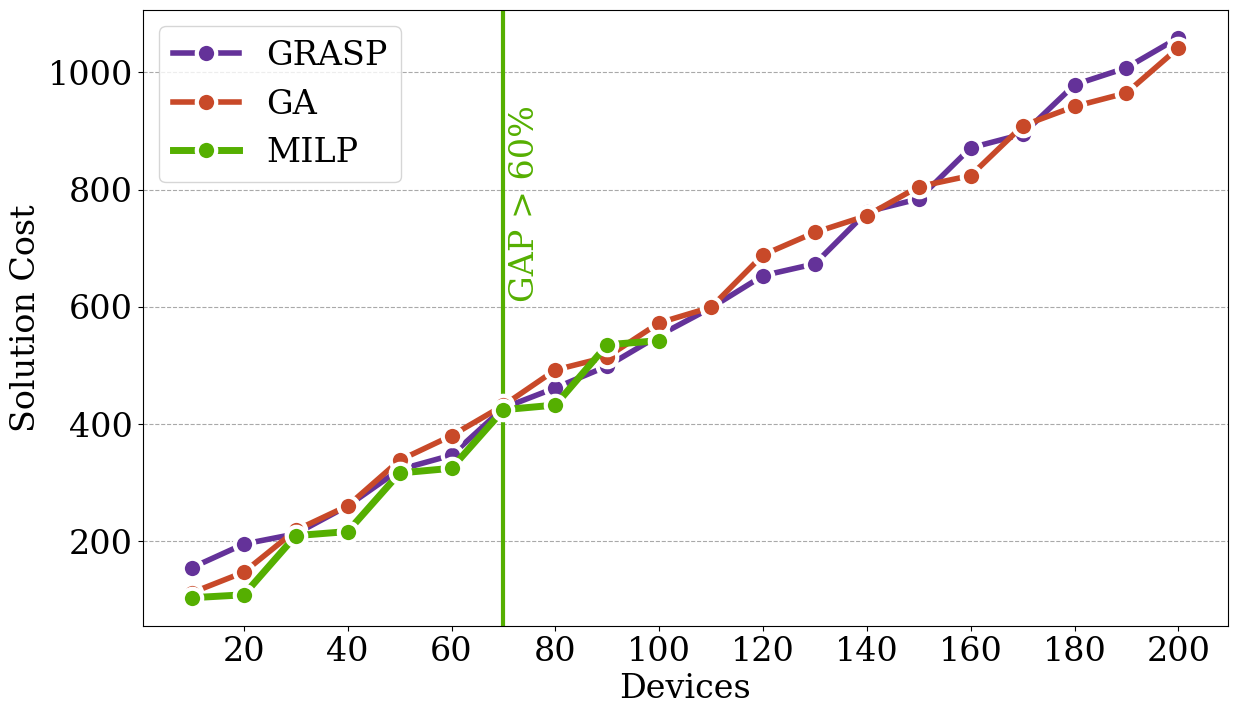

In [168]:
import numpy as np
from matplotlib import rcParams
import matplotlib.pyplot as plt
import pandas as pd
import os

rcParams['font.family'] = 'serif'
rcParams['font.size'] = 24

means_ga = []
error_ga = []
means_grasp = []
error_grasp = []
indexes = []

fig, ax1 = plt.subplots(figsize=(14, 8))

color1 = '#643299'
color2 = '#054AE3'
color3 = '#C84929'
color4 = '#DFAD23'
color5 = '#55AF01'
alpha = 0.6

pathFile = pathCWD + "MILP_perf_solutions.csv"
dataPkt = pd.read_csv(pathFile, sep=",")
dfMILP = pd.DataFrame(dataPkt)

pathFile = pathCWD + "GA_perf_solutions.csv"
dataPkt = pd.read_csv(pathFile, sep=",")
dfGA = pd.DataFrame(dataPkt)

pathFile = pathCWD + "GRASP_perf_solutions.csv"
dataPkt = pd.read_csv(pathFile, sep=",")
dfGrasp = pd.DataFrame(dataPkt)

for i in range(10, 201, 10):
    indexes.append(i)
    
    # ---- Random Diversification ----
    data = dfGA.loc[dfGA['numDevices'] == i]['objective'].array
    mean = np.mean(data)
    error = np.std(data) / np.sqrt(np.size(data))
    means_ga.append(mean)
    error_ga.append(error)
    
    # ---- Random Diversification ----
    data = dfGrasp.loc[dfGrasp['numDevices'] == i]['objective'].array
    mean = np.mean(data)
    error = np.std(data) / np.sqrt(np.size(data))
    means_grasp.append(mean)
    error_grasp.append(error)

ax1.plot(indexes, means_grasp, color=color1, mec='white', mew=3, marker='o', markersize=14, linestyle='-', label='GRASP', lw=4, zorder=4)
ax1.plot(indexes, means_ga, color=color3, mec='white', mew=3, marker='o', markersize=14, linestyle='-', label='GA', lw=4, zorder=4)
ax1.plot(dfMILP['numDevices'], dfMILP['objective'], color5, label='MILP', zorder=6, marker="o", markersize=14, mew=3, mec='white', linewidth=5)

plt.axvline(70, color=color5, lw=3)
plt.text(71, 620,'GAP > 60%',rotation=90, color=color5)

ax1.set_xlabel("Devices")
ax1.set_ylabel("Solution Cost")
ax1.set_xticks(range(20,210,20))
# ax1.set_ylim(400, 500)
ax1.tick_params(axis='y', which='major')
ax1.grid(True, 'major', 'y', linestyle='--', color='darkgrey', zorder=0)

bars, labels = ax1.get_legend_handles_labels()
ax1.legend(bars, labels, loc='best')
# fig.suptitle('Solving Time by Number of Virtual Positions')
plt.show()
# plt.savefig('fig/fig..pdf', format='pdf', bbox_inches = 'tight', pad_inches = 0)

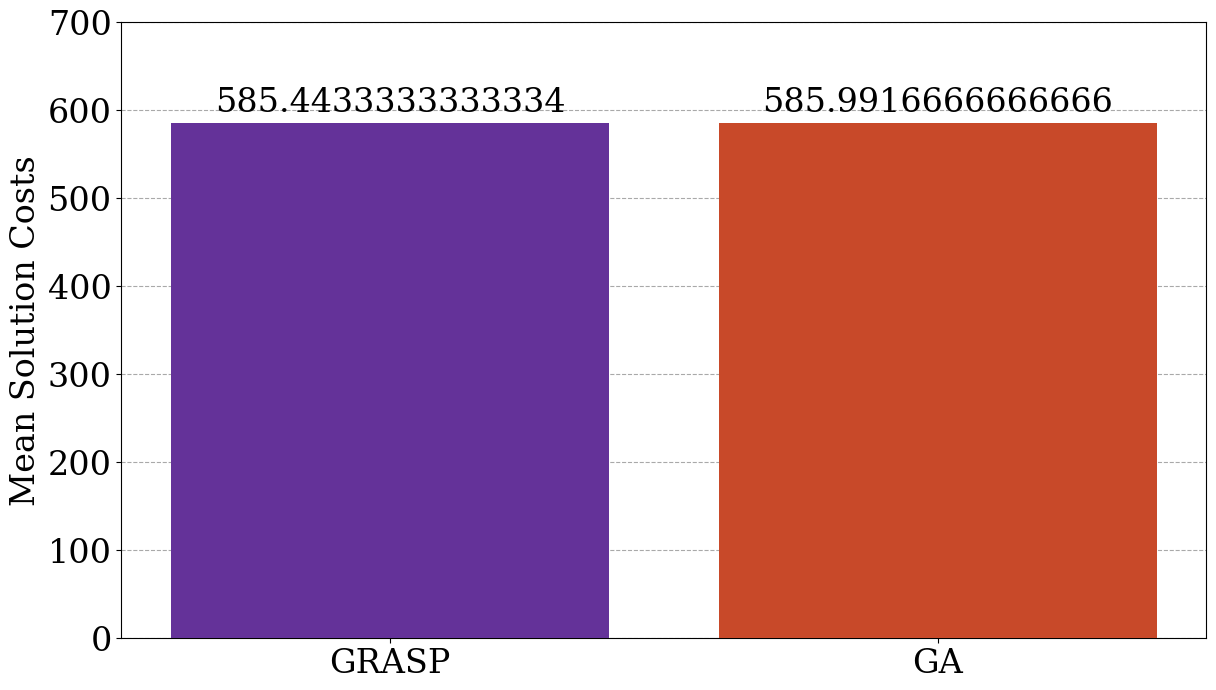

In [202]:
import numpy as np
from matplotlib import rcParams
import matplotlib.pyplot as plt
import pandas as pd
import os

rcParams['font.family'] = 'serif'
rcParams['font.size'] = 24

means_ga = []
error_ga = []
means_grasp = []
error_grasp = []
indexes = []

fig, ax1 = plt.subplots(figsize=(14, 8))

color1 = '#643299'
color2 = '#054AE3'
color3 = '#C84929'
color4 = '#DFAD23'
color5 = '#55AF01'
alpha = 0.6

pathFile = pathCWD + "GA_perf_solutions.csv"
dataPkt = pd.read_csv(pathFile, sep=",")
dfGA = pd.DataFrame(dataPkt)

pathFile = pathCWD + "GRASP_perf_solutions.csv"
dataPkt = pd.read_csv(pathFile, sep=",")
dfGrasp = pd.DataFrame(dataPkt)

for i in range(10, 201, 10):
    indexes.append(i)
    
    # ---- Random Diversification ----
    data = dfGA.loc[dfGA['numDevices'] == i]['objective'].array
    mean = np.mean(data)
    error = np.std(data) / np.sqrt(np.size(data))
    means_ga.append(mean)
    error_ga.append(error)
    
    # ---- Random Diversification ----
    data = dfGrasp.loc[dfGrasp['numDevices'] == i]['objective'].array
    mean = np.mean(data)
    error = np.std(data) / np.sqrt(np.size(data))
    means_grasp.append(mean)
    error_grasp.append(error)


bar1 = ax1.bar(1, np.mean(means_grasp), color=color1, linestyle='-', label='GRASP', lw=4, zorder=4)
bar2 = ax1.bar(2, np.mean(means_ga), color=color3, linestyle='-', label='GA', lw=4, zorder=4)

bar = bar1[0]
height = bar.get_height()
ax1.annotate(f'{height}', xy=(bar.get_x() + bar.get_width()/2, height), xytext=(0,3), textcoords="offset points", ha='center', va='bottom')

bar = bar2[0]
height = bar.get_height()
ax1.annotate(f'{height}', xy=(bar.get_x() + bar.get_width()/2, height), xytext=(0,3), textcoords="offset points", ha='center', va='bottom')

# ax1.set_xlabel("Devices")
ax1.set_ylabel("Mean Solution Costs")
ax1.set_xticks([1, 2], ["GRASP", "GA"])
ax1.set_ylim(0, 700)
ax1.tick_params(axis='y', which='major')
ax1.grid(True, 'major', 'y', linestyle='--', color='darkgrey', zorder=0)

bars, labels = ax1.get_legend_handles_labels()
# fig.suptitle('Solving Time by Number of Virtual Positions')
plt.show()
# plt.savefig('fig/fig..pdf', format='pdf', bbox_inches = 'tight', pad_inches = 0)

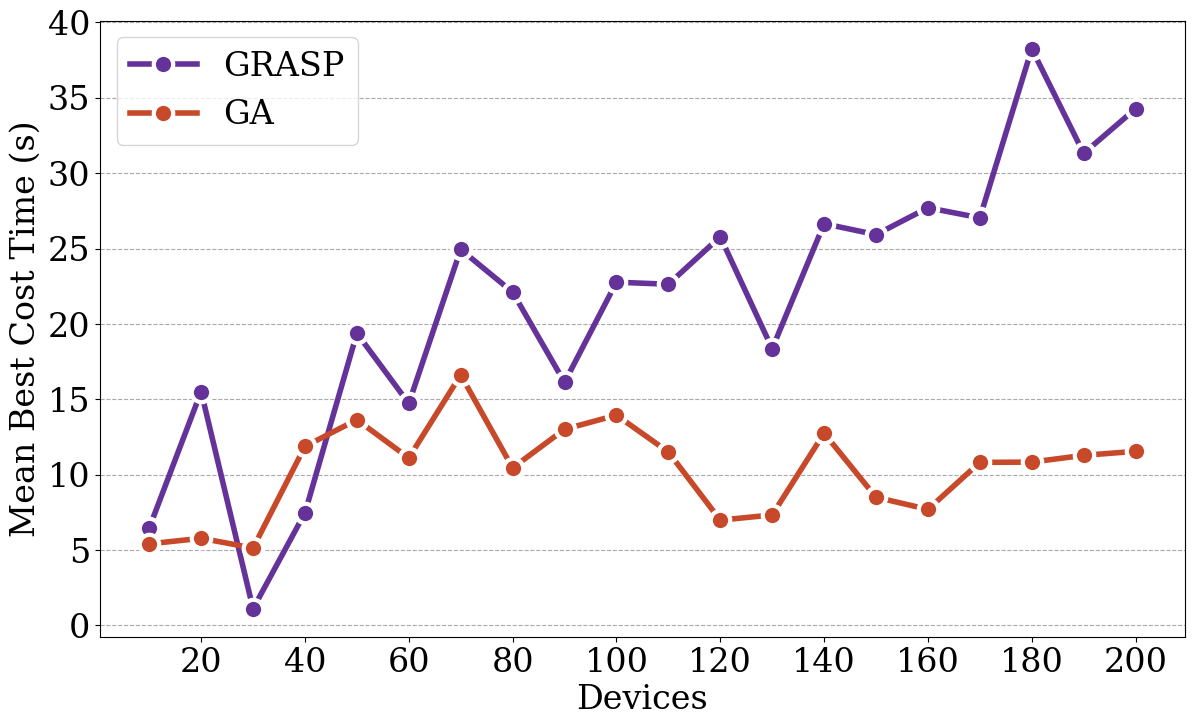

In [176]:
import numpy as np
from matplotlib import rcParams
import matplotlib.pyplot as plt
import pandas as pd
import os

rcParams['font.family'] = 'serif'
rcParams['font.size'] = 24

means_ga = []
error_ga = []
means_grasp = []
error_grasp = []
indexes = []

fig, ax1 = plt.subplots(figsize=(14, 8))

color1 = '#643299'
color2 = '#054AE3'
color3 = '#C84929'
color4 = '#DFAD23'
color5 = '#55AF01'
alpha = 0.6

pathFile = pathCWD + "GA_perf_solutions.csv"
dataPkt = pd.read_csv(pathFile, sep=",")
dfGA = pd.DataFrame(dataPkt)

pathFile = pathCWD + "GRASP_perf_solutions.csv"
dataPkt = pd.read_csv(pathFile, sep=",")
dfGrasp = pd.DataFrame(dataPkt)

for i in range(10, 201, 10):
    indexes.append(i)
    
    # ---- Random Diversification ----
    data = dfGA.loc[dfGA['numDevices'] == i]['bestCostTime'].array
    mean = np.mean(data)
    error = np.std(data) / np.sqrt(np.size(data))
    means_ga.append(mean)
    error_ga.append(error)
    
    # ---- Random Diversification ----
    data = dfGrasp.loc[dfGrasp['numDevices'] == i]['bestCostTime'].array
    mean = np.mean(data)
    error = np.std(data) / np.sqrt(np.size(data))
    means_grasp.append(mean)
    error_grasp.append(error)

ax1.plot(indexes, means_grasp, color=color1, mec='white', mew=3, marker='o', markersize=14, linestyle='-', label='GRASP', lw=4, zorder=4)
ax1.plot(indexes, means_ga, color=color3, mec='white', mew=3, marker='o', markersize=14, linestyle='-', label='GA', lw=4, zorder=4)

ax1.set_xlabel("Devices")
ax1.set_ylabel("Mean Best Cost Time (s)")
ax1.set_xticks(range(20,210,20))
# ax1.set_ylim(400, 500)
ax1.tick_params(axis='y', which='major')
ax1.grid(True, 'major', 'y', linestyle='--', color='darkgrey', zorder=0)

bars, labels = ax1.get_legend_handles_labels()
ax1.legend(bars, labels, loc='best')
# fig.suptitle('Solving Time by Number of Virtual Positions')
plt.show()
# plt.savefig('fig/fig..pdf', format='pdf', bbox_inches = 'tight', pad_inches = 0)

   id       x       y     z
0  56  5625.0  4375.0  45.0
1  39  5625.0  6875.0  45.0
2  55  5625.0  5625.0  45.0
3  54  4375.0  4375.0  45.0
4  21  6875.0  8125.0  45.0
5  59  3125.0  5625.0  45.0


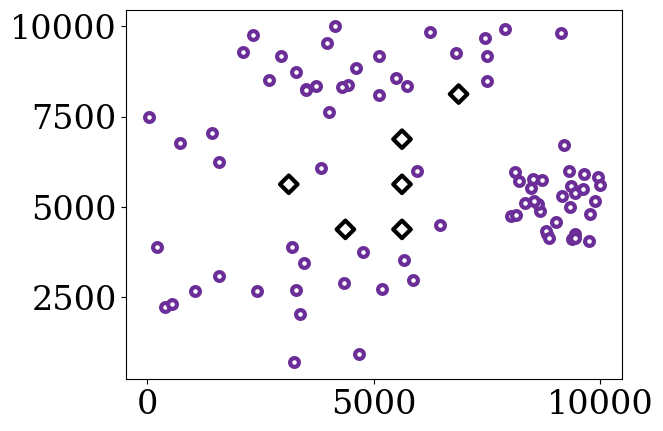

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

columns = ["x", "y", "z"]

pathCWD = os.getcwd()
pathGWPlacement = pathCWD + "/output/test_c2_Placement_1s_64x1Gv_80D.dat"
dataGWPlacement = pd.read_csv(pathGWPlacement, sep=",")
dfGWPlacement = pd.DataFrame(dataGWPlacement)

pathEDPlacement = pathCWD + "/data/endDevices_LNM_Placement_1s+80d.dat"
dataEDPlacement = pd.read_csv(pathEDPlacement, sep=" ", header=None, names=columns)
dfEDPlacement = pd.DataFrame(dataEDPlacement)

print(dfGWPlacement)

fig = plt.plot(figsize=(18, 18))

color1 = '#6B2D97'
color2 = '#96753C'
alpha = 0.9

# plt.annotate(dfEDPlacement['device'][i], (dfEDPlacement['x'][i]-150, dfEDPlacement['y'][i] + 100), zorder=15)
# plt.plot(x[i], y[i], '-', c='grey', zorder=0)

plt.scatter(dfEDPlacement['x'], dfEDPlacement['y'], c="white", edgecolors=color1, linewidths=3, s=40, zorder=10)
plt.scatter(dfGWPlacement['x'], dfGWPlacement['y'], c="None", edgecolors="black", linewidths=3, s=80, marker="D", zorder=10)

# plt.yticks([0, 1000, 2000, 3000, 2000, 5000, 6000, 7000, 8000, 9000, 10000])
# plt.xticks([0, 1000, 2000, 3000, 2000, 5000, 6000, 7000, 8000, 9000, 10000])

plt.savefig('map.pdf', format='pdf', bbox_inches = 'tight', pad_inches = 0.1)